In [1]:
import cv2
import matplotlib.pyplot as plt

In [11]:
img = cv2.imread(r'Desktop\fruits.jpg')

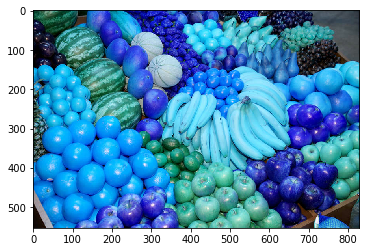

In [10]:
plt.imshow(img, cmap = plt.get_cmap('gray'))
plt.show()

In [8]:
org_shape = img.shape
print(img.shape)
print(img)

(553, 830, 3)
[[[ 3 67 45]
  [ 1 65 43]
  [ 1 63 41]
  ...
  [42 48 55]
  [38 42 47]
  [47 50 54]]

 [[13 77 55]
  [ 4 68 46]
  [ 0 58 36]
  ...
  [42 48 55]
  [38 42 47]
  [47 50 54]]

 [[24 88 66]
  [10 74 52]
  [ 0 59 37]
  ...
  [43 49 56]
  [39 43 48]
  [47 50 54]]

 ...

 [[16  7  3]
  [16  7  3]
  [16  7  3]
  ...
  [20 41 49]
  [17 35 42]
  [32 44 48]]

 [[16  7  3]
  [16  7  3]
  [16  7  3]
  ...
  [27 48 56]
  [25 43 50]
  [40 52 56]]

 [[ 7  7  7]
  [ 7  7  7]
  [ 7  7  7]
  ...
  [35 49 47]
  [34 48 46]
  [25 39 37]]]


In [12]:
img = img.reshape((-1,3))

In [13]:
print(img)

[[ 3 67 45]
 [ 1 65 43]
 [ 1 63 41]
 ...
 [35 49 47]
 [34 48 46]
 [25 39 37]]


In [14]:
#plotting

from sklearn.cluster import KMeans


In [15]:
km = KMeans()
km.fit(img)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [16]:
centers = km.cluster_centers_

In [17]:
print(centers)

[[ 17.32618183  29.40838988 146.60483926]
 [135.33715207 209.73689749 229.13318058]
 [  9.25667857 155.02189267 236.17162292]
 [ 69.86866302 157.20219312 156.84753676]
 [ 15.23574756  24.31232529  40.21249471]
 [ 38.89336703  84.42426471 200.96404718]
 [ 45.29089843  96.53549712  91.34282921]
 [ 77.3494285  188.01038022 229.0072145 ]]


In [18]:

import numpy as np
centers = np.array(centers,dtype='uint8')

print(centers)

[[ 17  29 146]
 [135 209 229]
 [  9 155 236]
 [ 69 157 156]
 [ 15  24  40]
 [ 38  84 200]
 [ 45  96  91]
 [ 77 188 229]]


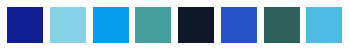

In [19]:
#subplot
import matplotlib.pyplot as plt
i = 1

center_list = []
for col in centers:
    plt.subplot(1,8,i)
    plt.axis("off")
    i+=1
    #plt.imshow()
    center_list.append(col)
    
    a = np.zeros((50,50,3),dtype='uint8')
    a[:,:,:] = col
    plt.imshow(a)

In [20]:
print(center_list)

[array([ 17,  29, 146], dtype=uint8), array([135, 209, 229], dtype=uint8), array([  9, 155, 236], dtype=uint8), array([ 69, 157, 156], dtype=uint8), array([15, 24, 40], dtype=uint8), array([ 38,  84, 200], dtype=uint8), array([45, 96, 91], dtype=uint8), array([ 77, 188, 229], dtype=uint8)]


In [21]:
# using Kmeans Algo
print(img.shape)
print(km.labels_)
print(km.labels_.shape)

(458990, 3)
[4 4 4 ... 4 4 4]
(458990,)


(458990, 3)


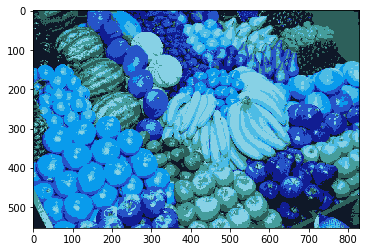

(553, 830, 3)


In [22]:
new_img = np.zeros((km.labels_.shape[0],3),dtype='uint8')
print(new_img.shape)

for px in range(new_img.shape[0]):
    new_img[px] = center_list[km.labels_[px]]

new_img = new_img.reshape((org_shape))
plt.imshow(new_img) 
plt.show()
print(new_img.shape)